In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers
from tensorflow import keras


In [3]:
print(tf.__version__)

2.16.1


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


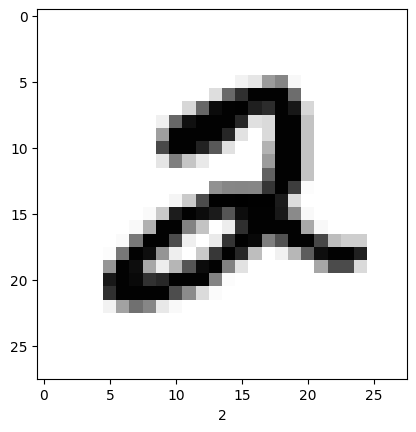

In [5]:
plt.imshow(x_train[5],cmap='gray_r')
plt.xlabel(y_train[5]);

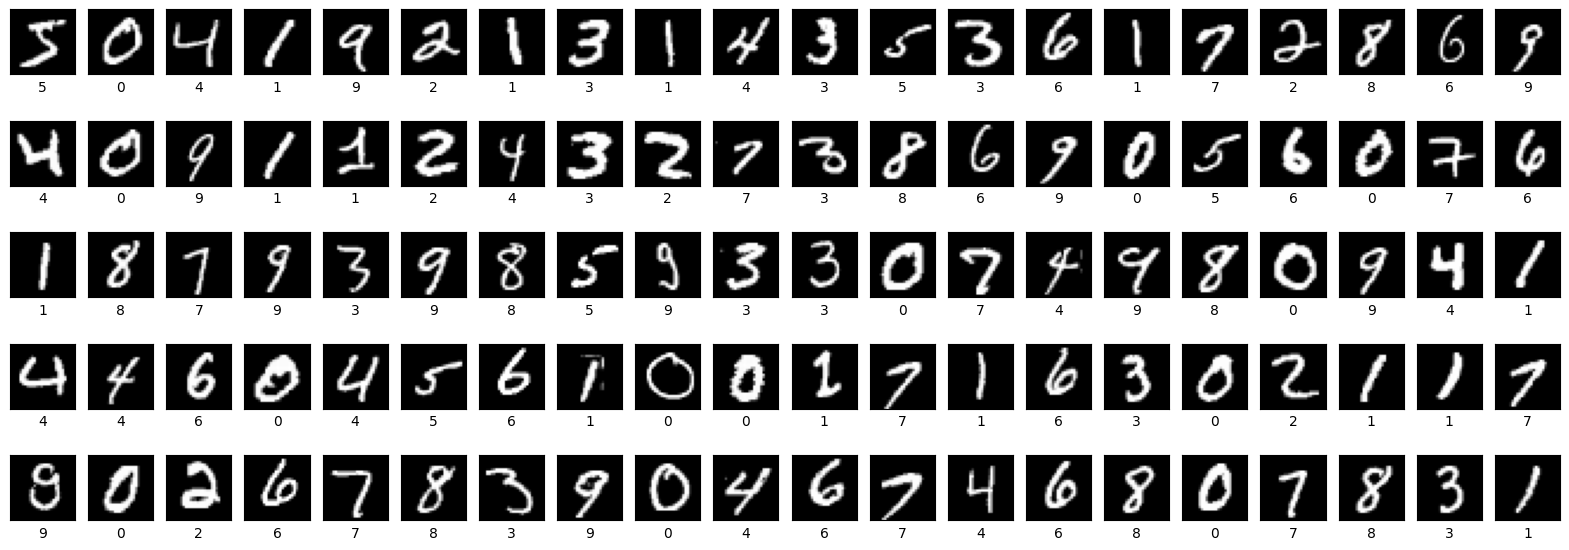

In [6]:
plt.figure(figsize=(20,7))
for c in range(100):
    plt.subplot(5,20,c+1)
    plt.imshow(x_train[c],cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(y_train[c])
plt.show()

### Normalize Data

In [7]:
x_train = x_train.reshape(-1,28*28).astype('float32') / 255.0
x_test = x_test.reshape(-1,28*28).astype('float32') / 255.0

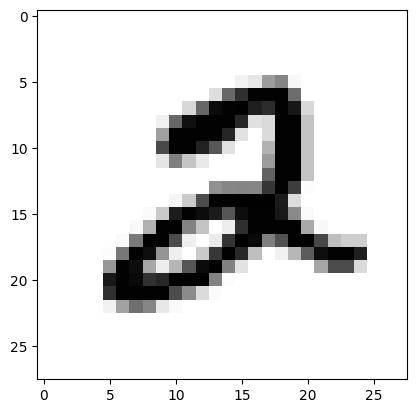

In [9]:
a = x_train[5].reshape(28,28)
plt.imshow(a, cmap='gray_r');

In [13]:
model = keras.Sequential([
    keras.Input(shape=(28*28,)),
    layers.Dense(units=256, activation='relu'),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=10, activation='softmax'),
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [15]:
h = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.3)

Epoch 1/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8556 - loss: 0.5050 - val_accuracy: 0.9566 - val_loss: 0.1468
Epoch 2/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9653 - loss: 0.1128 - val_accuracy: 0.9668 - val_loss: 0.1095
Epoch 3/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9787 - loss: 0.0692 - val_accuracy: 0.9714 - val_loss: 0.0959
Epoch 4/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9849 - loss: 0.0482 - val_accuracy: 0.9636 - val_loss: 0.1254
Epoch 5/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9886 - loss: 0.0350 - val_accuracy: 0.9700 - val_loss: 0.1098


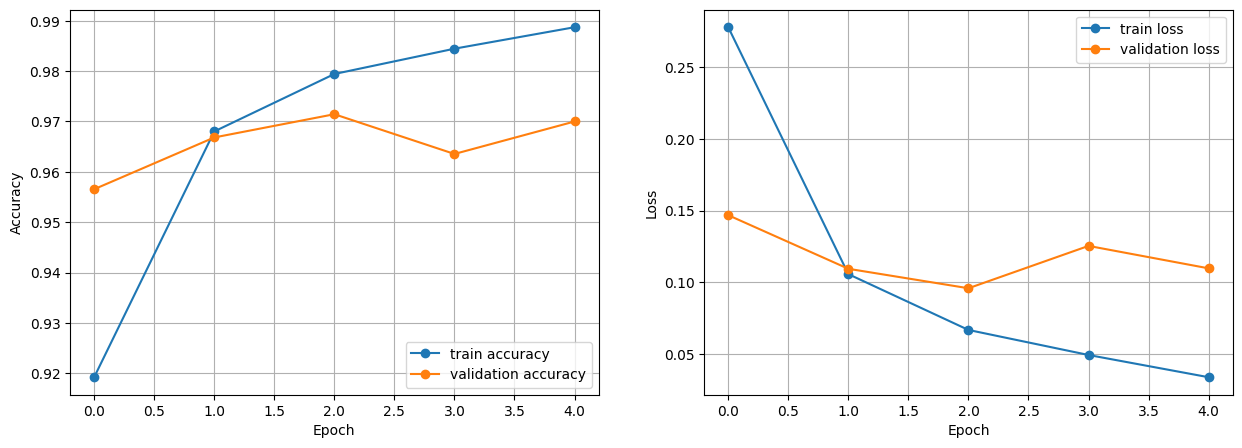

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()